Models from: https://pypi.org/project/image-classifiers/

TODO: Test models using large Negative samples

# Binary Classification

In [ ]:
import numpy as np                                       #NumPy
import pandas as pd                                      #PANDAS
import tensorflow as tf                                  #Tensor-Flow
from tensorflow import keras                             #Keras
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt                          #Image display configurations
# for keras
from classification_models.keras import Classifiers
import os, sys

## Load images

### Load images

In [62]:
#Tested:
#Test set is NOT all negative
#Default shuffle=True (but put anyway to help during review)
#Test set and training set do NOT have any overlapping images
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    "./Data/Images",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224,224),
    labels='inferred',
    label_mode='categorical',
    shuffle=True
)
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "./Data/Images",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224,224),
    labels='inferred',
    label_mode='categorical',
    shuffle=True
)

Found 157676 files belonging to 3 classes.
Using 126141 files for training.
Found 157676 files belonging to 3 classes.
Using 31535 files for validation.


In [63]:
count=0 #No change after rescaling
for image, label in training_set:
    count+=1
print(count)

count=0
for image, label in test_set:
    count+=1
print(count)

3942
986


#### Sample images

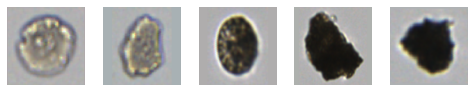

In [64]:
plt.figure(figsize=(10, 10))
class_names = training_set.class_names
for images, labels in training_set.take(1):
    for i in range(5):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

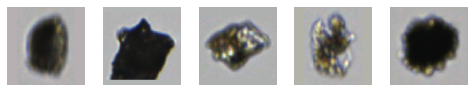

In [65]:
plt.figure(figsize=(10, 10))
class_names = test_set.class_names
for images, labels in test_set.take(1):
    for i in range(5):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

## Train Models

## Source 1: https://pypi.org/project/image-classifiers/

In [5]:
key_output = ""
i=0
for key in Classifiers.models.keys():
    i+=1
    key_output += key+"\t"
    if(i==3): 
        key_output += "\n"
        i=0
print(key_output)

resnet18	resnet34	resnet50	
resnet101	resnet152	seresnet18	
seresnet34	seresnet50	seresnet101	
seresnet152	seresnext50	seresnext101	
senet154	resnet50v2	resnet101v2	
resnet152v2	resnext50	resnext101	
vgg16	vgg19	densenet121	
densenet169	densenet201	inceptionresnetv2	
inceptionv3	xception	nasnetlarge	
nasnetmobile	mobilenet	mobilenetv2	



### ResNet18 (Unprocess training data) COMPLETED

In [52]:
resnet18, preprocess = Classifiers.get('resnet18')

In [53]:
model = resnet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [54]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_set)
model.save("models/resnet18_NEW")

3942/3942 [==============================] - 11341s 3s/step - loss: 0.0040 - accuracy: 0.9989
INFO:tensorflow:Assets written to: models/resnet18_NEW\assets


### ResNet18 (Preprocess training data) COMPLETED

In [55]:
resnet18, preprocess = Classifiers.get('resnet18')

In [56]:
renet18_preprocessed = preprocess(training_set)
renet18_preprocessed_test = preprocess(test_set)

In [57]:
model = resnet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [58]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(renet18_preprocessed)
model.save("models/resnet18_preprocessed_NEW")

3942/3942 [==============================] - 13329s 3s/step - loss: 0.0040 - accuracy: 0.9990
INFO:tensorflow:Assets written to: models/resnet18_preprocessed_NEW\assets


## Source 2: https://keras.io/api/applications/

### MobileNetV2 (Completed on Old)

In [10]:
model = tf.keras.applications.MobileNetV2(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 #tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [11]:
base_learning_rate = 0.001 #Generic: copied from demo site
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
model.fit(training_set)
model.save("models/MobileNetV2_NEW")

3942/3942 [==============================] - 7448s 2s/step - loss: 0.0108 - accuracy: 0.9960
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/MobileNetV2_NEW\assets


In [13]:
#model.save_weights("models/MobileNetV2_weights/MobileNetV2_weights")

### EfficientNetB0 (Completed on Old)

In [14]:
model = tf.keras.applications.EfficientNetB0(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [15]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
model.fit(training_set)
model.save("models/EfficientNetB0_NEW")

3942/3942 [==============================] - 11273s 3s/step - loss: 0.0096 - accuracy: 0.9969
INFO:tensorflow:Assets written to: models/EfficientNetB0_NEW\assets


### NASNetMobile (Completed on Old)

In [17]:
model = tf.keras.applications.NASNetMobile(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [18]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
model.fit(training_set)
model.save("models/NASNetMobile_NEW")

3942/3942 [==============================] - 8758s 2s/step - loss: 0.0090 - accuracy: 0.9975
INFO:tensorflow:Assets written to: models/NASNetMobile_NEW\assets


### InceptionV3 COMPLETED

In [49]:
model = tf.keras.applications.InceptionV3(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [50]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [51]:
model.fit(training_set)
model.save("models/InceptionV3_NEW")

3942/3942 [==============================] - 13522s 3s/step - loss: 0.0234 - accuracy: 0.9907
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/InceptionV3_NEW\assets


### DenseNet121

In [ ]:
model = tf.keras.applications.DenseNet121(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(training_set) # 12 hours
model.save("models/DenseNet121_NEW")

### ResNet50V2

In [20]:
model = tf.keras.applications.ResNet50V2(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [21]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
model.fit(training_set)
model.save("models/ResNet50V2_NEW")

 492/3942 [==>...........................] - ETA: 7:50:58 - loss: 0.0655 - accuracy: 0.9750

KeyboardInterrupt: 

## Score models

In [63]:
def get_predicted_class(prediction):
    x = 0
    for i in range(1,3): #REMEMBER: Change second parameter if number of classes increases
        if prediction[0][i] > prediction[0][x]:
            x = i
    #return ["Negative", "Positive"][x]
    return ["Demospongiae", "Hexactinellida", "Negative"][x]
    
def get_label_index(label):
    array = label.numpy()[0]
    i = 0
    while array[i] != 1:
        i += 1
    #return ["Negative", "Positive"][i]
    return ["Demospongiae", "Hexactinellida", "Negative"][i]

def score_model(model,test_set):
    predictions = []
    for image, label in test_set:
        entry = []
        predict = model.predict(image)
        entry.append(get_predicted_class(predict))
        entry.append(get_label_index(label))
        
        predictions.append(entry)
    get_score(predictions)
    return predictions

def get_score(predictions):
    total_correct = 0
    for x in predictions:
        if x[0] == x[1]:
            total_correct += 1
        else:
            print("labeled "+x[1]+" as "+x[0])
    score = total_correct/len(predictions)*100
    print("Accuracy: "+str(round(score,2))+"%")
    return score

In [3]:
test_classes = {"Demospongiae":0, "Hexactinellida":0, "Negative":0}
count=0
for image, label in test_set:
    test_classes[get_label_index(label)]+=1
test_classes

NameError: name 'test_set' is not defined

In [ ]:
scores = {}

In [ ]:
ResNet18 = keras.models.load_model("models/resnet18_NEW")
score = score_model(ResNet18, test_set)
scores["ResNet18 (unprocessed)"] = score

In [4]:
ResNet18_PP = keras.models.load_model("models/resnet18_preprocessed_NEW")
resnet18, preprocess = Classifiers.get('resnet18')
renet18_preprocessed_test = preprocess(test_set)

score = score_model(ResNet18_PP, renet18_preprocessed_test)
scores["ResNet18 (preprocessed)"] = score

NameError: name 'test_set' is not defined

In [40]:
MobileNetV2 = keras.models.load_model("models/MobileNetV2_NEW") #21% (overfitted)
#MobileNetV2.load_weights("models/MobileNetV2_weights/MobileNetV2_weights")
score = score_model(MobileNetV2, test_set)
scores["MobileNetV2"] = score 

labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled D

In [41]:
EfficientNetB0 = keras.models.load_model("models/EfficientNetB0_NEW") #100%, but has many warnings
score = score_model(EfficientNetB0, test_set)
scores["EfficientNetB0"] = score

Accuracy: 100.0%


In [42]:
NASNetMobile = keras.models.load_model("models/NASNetMobile_NEW") #1% (overfitted)
score = score_model(NASNetMobile, test_set)
scores["NASNetMobile"] = score

labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactin

In [43]:
InceptionV3 = keras.models.load_model("models/InceptionV3_NEW") #96% but failed completely on Ambiguous data
score = score_model(InceptionV3, test_set)
scores["InceptionV3"] = score #score below is in reverse (miss labeling Positive as Negative) 

labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospong

In [44]:
scores #Binary: ResNet18 unprocessed = EffNet >= ResNet preprocessed > Inception >>>> Mobile >> NASNet
       #3 classes: ResNet (unprocessed) = Eff >= ResNet18 (preprocessed) > InceptionV3 >>>> Mobile >>> NASNetMobile 

{'ResNet18 (unprocessed)': 100.0,
 'ResNet18 (preprocessed)': 100.0,
 'MobileNetV2': 20.08113590263692,
 'EfficientNetB0': 100.0,
 'NASNetMobile': 1.2170385395537524,
 'InceptionV3': 96.95740365111561}

## Test classification on Ambiguous data

### Load Ambihuous Data

In [66]:
amb_set = tf.keras.preprocessing.image_dataset_from_directory(
    "./Data/Ambiguous",
    seed=42,
    image_size=(224,224),
    labels='inferred',
    label_mode='categorical',
    shuffle=True
)

Found 2342 files belonging to 2 classes.


### Load successful models

In [17]:
ResNet18 = keras.models.load_model("models/resnet18_NEW")
EfficientNetB0 = keras.models.load_model("models/EfficientNetB0_NEW") #Has many warnings
InceptionV3 = keras.models.load_model("models/InceptionV3_NEW") #Failed

ResNet18_PP = keras.models.load_model("models/resnet18_preprocessed_NEW")

### Preprocess for ResNet18 (preprocessed)

In [67]:
resnet18, preprocess = Classifiers.get('resnet18')
renet18_preprocessed_amb = preprocess(amb_set)

### Classify (Note: printed calssification are NOT correct. It should only be a problem it it is labeled as Negative)

In [68]:
score_model(InceptionV3, amb_set) #0%

labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as 

[['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negative', 'Hexactinellida'],
 ['Negativ

In [69]:
score_model(EfficientNetB0, amb_set) #"100%"

labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as H

[['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 

In [70]:
score_model(ResNet18, amb_set) #"100%"

labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as H

[['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Hexactinellida', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],

In [71]:
score_model(ResNet18_PP, renet18_preprocessed_amb) #"100%"

labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Demospongiae as H

[['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Hexactinellida', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'],
 ['Hexactinellida', 'Hexactinellida'],
 ['Demospongiae', 'Hexactinellida'

# 3-class classification

### Prepare data

In [1]:
import numpy as np                                       #NumPy
import pandas as pd                                      #PANDAS
import tensorflow as tf                                  #Tensor-Flow
from tensorflow import keras                             #Keras
import random
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt                          #Image display configurations
# for keras
from classification_models.keras import Classifiers
import os, sys

In [2]:
#Old: not recommended because it requires a lot of space (it overflowed m 16GB RAM computer 5 times)
def load_training_images(neg_limit=-1):
    X = []
    y = []
        
    i=0
    for dir in os.listdir("Data/Images/Negative"):
        for folder in os.listdir("Data/Images/Negative"+"/"+dir):
            x=0
            for image in os.listdir("Data/Images/Negative"+"/"+dir+"/"+folder):
                #image_arr = cv2.imread("Data/Images/Negative"+"/"+dir+"/"+folder+"/"+image)
                #X.append(image_arr.reshape(-1, 224, 224, 1))
                X.append(cv2.imread("Data/Images/Negative"+"/"+dir+"/"+folder+"/"+image))
                y.append(2)
                i+=1
                x+=1
                #if x==4: break
        #        if(i==neg_limit): break
        #   if(i==neg_limit): break
        #if(i==neg_limit): break
        
    #Randomly remove images random to reach limit
    random.shuffle(X);
    if(neg_limit!=-1):
        for x in range(i-neg_limit):
            X.pop()
            y.pop()
    print(str(len(X))+" Negative images loaded")
    
    i=0
    for image in os.listdir("Data/Images/Demospongiae"):
        #image_arr = cv2.imread("Data/Images/Demospongiae/"+image)
        #X.append(image_arr.reshape(-1, 224, 224, 1))
        X.append(cv2.imread("Data/Images/Demospongiae/"+image))
        y.append(0)
        i+=1
    print(str(i)+" Demospongiae images loaded")
    
    i=0
    for image in os.listdir("Data/Images/Hexactinellida"):
        #image_arr = cv2.imread("Data/Images/Hexactinellida/"+image)
        #X.append(image_arr.reshape(-1, 224, 224, 1))
        X.append(cv2.imread("Data/Images/Hexactinellida/"+image))
        y.append(1)
        i+=1
    print(str(i)+" Hexactinellida images loaded")
    
    #Normalize
    #X = np.array(X)
    #X = X / 255
    #X = X.reshape(-1, 224, 224, 1)
    #print("Images normalized")
    
    return X, y

In [3]:
#152817 total negative images
X, y = load_training_images(100000)

100000 Negative images loaded
3481 Demospongiae images loaded
1378 Hexactinellida images loaded


In [4]:
print(len(X))
len(y)

104859


104859

In [5]:
X = np.asarray(X)#.astype(np.float32)
#y = np.asarray(y).astype(np.float32)
#X = X.reshape(-1, 224, 224, 3)
#X = X / 255
#print("Images normalized")

In [6]:
#*** Skip
#corrupted = []
#for i in range(len(X)):
#    try:
#        X[i] = tf.reshape(tf.convert_to_tensor(X[i]), [-1,224,224,3])
#    except:
#        corrupted.append(i)
#        print(i)

In [7]:
#*** Skip
#corrupted = []
#X = [element for i,element in enumerate(X) if i not in corrupted]
#print(len(X))
#**From here, need to re-run without the previous block so we're able to split the data and convert it later

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)

In [9]:
#X_train = tf.reshape(tf.convert_to_tensor(X_train), [-1,224,224,3])
#X_test = tf.reshape(tf.convert_to_tensor(X_test), [-1,224,224,3])
#y_train = tf.convert_to_tensor(y_train)
#y_test = tf.convert_to_tensor(y_test)

#X_train = X_train.reshape(-1,224,224,3)
#X_test = np.array(X_test).reshape(-1,224,224,3)
#y_train = keras.utils.to_categorical(y_train,3)
#y_test = keras.utils.to_categorical(y_test,3)

In [10]:
count1=0
for image in X_train:
    count1+=1
print(count1)

count2=0
for image in X_test:
    count2+=1
print(count2)
print("total: "+str(count1+count2))

83887
20972
total: 104859


### Source 1 models

In [11]:
key_output = ""
i=0
for key in Classifiers.models.keys():
    i+=1
    key_output += key+"\t"
    if(i==3): 
        key_output += "\n"
        i=0
print(key_output)

resnet18	resnet34	resnet50	
resnet101	resnet152	seresnet18	
seresnet34	seresnet50	seresnet101	
seresnet152	seresnext50	seresnext101	
senet154	resnet50v2	resnet101v2	
resnet152v2	resnext50	resnext101	
vgg16	vgg19	densenet121	
densenet169	densenet201	inceptionresnetv2	
inceptionv3	xception	nasnetlarge	
nasnetmobile	mobilenet	mobilenetv2	



#### ResNet18 COMPLETED

In [12]:
resnet18, preprocess = Classifiers.get('resnet18')

In [13]:
model = resnet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])
#model.summary()

In [14]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train) #2hrs
model.save("models/resnet18_N75k") #Only 2622 trained? (It's fine 2622=83887/32, where 83887=len(X_train) and 32=batch size)

1997/1997 [==============================] - 4794s 2s/step - loss: 0.0088 - accuracy: 0.9976
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/resnet18_N75k\assets


#### MobileNet COMPLETED

In [59]:
mobilenet, preprocess = Classifiers.get('mobilenet')

In [60]:
model = mobilenet(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [61]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/mobilenet_S6")  #2hrs

392/392 [==============================] - 1235s 3s/step - loss: 0.0368 - accuracy: 0.9890
INFO:tensorflow:Assets written to: models/mobilenet_S6\assets


#### SE-ResNet18 COMPLETED

In [62]:
seresnet18, preprocess = Classifiers.get('seresnet18')

In [63]:
model = seresnet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [65]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/seresnet18_S6") #4hrs

392/392 [==============================] - 2323s 6s/step - loss: 0.0277 - accuracy: 0.9927
INFO:tensorflow:Assets written to: models/seresnet18_S6\assets


#### InceptionV3 COMPLETED

In [21]:
inceptionv3, preprocess = Classifiers.get('inceptionv3')

In [22]:
model = inceptionv3(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [23]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/inceptionv3") #5.5hrs

1997/1997 [==============================] - 11364s 6s/step - loss: 0.0094 - accuracy: 0.9978
INFO:tensorflow:Assets written to: models/inceptionv3\assets


#### Xception COMPLETED

In [32]:
xception, preprocess = Classifiers.get('xception')

In [33]:
model = xception(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [34]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/xception") #6.5 hrs

1997/1997 [==============================] - 25320s 13s/step - loss: 0.0268 - accuracy: 0.9927
INFO:tensorflow:Assets written to: models/xception\assets


#### DenseNet121 COMPLETED

In [29]:
densenet121, preprocess = Classifiers.get('densenet121')

In [32]:
model = densenet121(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [33]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/densenet121_S4") #9hrs

302/302 [==============================] - 4435s 15s/step - loss: 0.0394 - accuracy: 0.9898
INFO:tensorflow:Assets written to: models/densenet121_S4\assets


#### Inception ResNet V2

In [34]:
inceptionresnetv2, preprocess = Classifiers.get('inceptionresnetv2')

In [35]:
model = inceptionresnetv2(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/inceptionresnetv2_S4") #12hrs

 16/302 [>.............................] - ETA: 4:27:04 - loss: 0.5052 - accuracy: 0.8281

#### ResNext50

In [ ]:
resnext50, preprocess = Classifiers.get('resnext50')

In [ ]:
model = resnext50(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/resnext50_S4") #16hrs

#### SE-ResNeXt50

In [ ]:
seresnext50, preprocess = Classifiers.get('seresnext50')

In [ ]:
model = seresnext50(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/seresnext50_S4") #20hrs

#### ~~SE-Net154~~ (Crashes CPU after 1 batch (tested on 100k negatives))!

#### VGG16

In [ ]:
vgg16, preprocess = Classifiers.get('vgg16')

In [ ]:
model = vgg16(input_shape=(224,224,3), weights='imagenet', include_top=False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train)
model.save("models/vgg16") #22hrs

### Source 2 models

#### VGG16 COMPLETE

In [23]:
model = tf.keras.applications.VGG16(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [24]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train)
model.save("models/VGG16_S4")

302/302 [==============================] - 2087s 7s/step - loss: 1.6451 - accuracy: 0.7602
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/VGG16_S4\assets


#### NASNetMobile COMPLETE

In [27]:
model = tf.keras.applications.NASNetMobile(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [28]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
model.fit(X_train,y_train)
model.save("models/NASNetMobile_S4")

302/302 [==============================] - 699s 2s/step - loss: 0.0446 - accuracy: 0.9875
INFO:tensorflow:Assets written to: models/NASNetMobile_S4\assets


#### EfficientNetB0 COMPLETE

In [30]:
model = tf.keras.applications.EfficientNetB0(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [31]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train)
model.save("models/EfficientNetB0_S4")

302/302 [==============================] - 910s 3s/step - loss: 0.0453 - accuracy: 0.9856
INFO:tensorflow:Assets written to: models/EfficientNetB0_S4\assets


#### ~~EfficientNetV2B0~~ Possibly removed

In [34]:
model = tf.keras.applications.EfficientNetV2B0(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

AttributeError: module 'tensorflow.keras.applications' has no attribute 'EfficientNetV2B0'

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train)
model.save("models/EfficientNetV2B0_S4")

#### ResNet50

In [35]:
model = tf.keras.applications.ResNet50(input_shape = (224, 224,3), include_top = False)
model = tf.keras.Sequential([model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [36]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train)
model.save("models/ResNet50_S4")

302/302 [==============================] - 2330s 8s/step - loss: 0.1397 - accuracy: 0.9622
INFO:tensorflow:Assets written to: models/ResNet50_S4\assets


### Score

In [11]:
count1=0
test=[0,0,0]
for label in y_train:
    test+=label
print("train: "+str(test))

count1=0
test=[0,0,0]
for label in y_test:
    test+=label
print("test:  "+str(test))
print("Model can only predict negative values if accuarcy = "+str((test[2])/(test[0]+test[1]+test[2])*100)+"%")

train: [ 2772.  1096. 80019.]
test:  [  709.   282. 19981.]
Model can only predict negative values if accuarcy = 95.2746519168415%


In [12]:
score = {}
def get_predicted_class(prediction):
    x = 0
    for i in range(1,3): #REMEMBER: Change second parameter if number of classes increases
        if prediction[i] > prediction[x]:
            x = i
    #return ["Negative", "Positive"][x]
    return ["Demospongiae", "Hexactinellida", "Negative"][x]
    
def get_label_index(label):
    i = 0
    while label[i] != 1:
        i += 1
    #return ["Negative", "Positive"][i]
    return ["Demospongiae", "Hexactinellida", "Negative"][i]

def get_score(predictions):
    total_correct = 0
    for x in predictions:
        if x[0] == x[1]:
            total_correct += 1
        else:
            print("labeled "+x[1]+" as "+x[0])
    score = total_correct/len(predictions)*100
    print("Accuracy: "+str(round(score,2))+"%")
    return score

def score_model(model_name):
    predictions = []
    predict = keras.models.load_model("models/"+model_name).predict(X_test)
    for i, prediction in enumerate(predict):
        entry = []
        entry.append(get_predicted_class(prediction))
        entry.append(get_label_index(y_test[i]))

        predictions.append(entry)
    score[model_name] = get_score(predictions)

In [13]:
score_model("resnet18_N75k") #99%; 99.97% (100k Neg)

labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Demospongiae as Hexactinellida
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.97%


In [14]:
score_model("resnet18_S4") #99%; 99.94% (100k Neg)

labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.94%


In [15]:
score_model("mobilenet_S6") #99%; 99.96% (100k Neg)

labeled Demospongiae as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.96%


In [16]:
score_model("seresnet18_S6") #99%; 99.95% (100k Neg)

labeled Hexactinellida as Negative
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.95%


In [17]:
score_model("inceptionv3") #99%; 99.97% (100k Neg)

labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.97%


In [18]:
score_model("xception") #99%; 99.94% (100k Neg)

labeled Hexactinellida as Demospongiae
labeled Demospongiae as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Demospongiae as Negative
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Negative
labeled Demospongiae as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Demospongiae as Negative
Accuracy: 99.94%


In [19]:
score_model("densenet121_S4") #99%; 99.96% (100k Neg, long runtime)

labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.96%


In [13]:
score_model("VGG16_S4") #91%; 98.91% (100k Neg, long runtime)

labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Negative
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
la

In [14]:
score_model("NASNetMobile_S4") #10%, 1.34% (100k Neg)

labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as Hexactinellida
labeled Negative as 

In [15]:
score_model("EfficientNetB0_S4") #99%; 99.92% (100k neg, multiple warnings)

labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Demospongiae as Hexactinellida
labeled Demospongiae as Hexactinellida
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Demospongiae as Hexactinellida
labeled Hexactinellida as Demospongiae
labeled Negative as Demospongiae
labeled Hexactinellida as Demospongiae
labeled Hexactinellida as Demospongiae
Accuracy: 99.92%


In [16]:
score_model("ResNet50_S4") #65%; 95.87% (100k Neg)

labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Demospongiae as Negative
labeled Demospongiae as Negative
labeled Hexactinellida as Negative
labeled Hexacti

In [17]:
score

{'VGG16_S4': 98.91283616250239,
 'NASNetMobile_S4': 1.3446500095365248,
 'EfficientNetB0_S4': 99.92370780087737,
 'ResNet50_S4': 95.87068472248713}

In [59]:
predictions = []
for i, image in enumerate(inputX):
    entry = []
    print(X_test[i].shape)
    predict = ResNet18.predict(X_test[i])
    entry.append(get_predicted_class(predict))
    entry.append(get_label_index(y_test[i]))
    #entry.append(["Demospongiae", "Hexactinellida", "Negative"][y_test[i]])

    predictions.append(entry)
get_score(predictions)

(224, 224, 3)


ValueError: in user code:

    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\truon\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer bn_data is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [32, 224, 3]


### Create a bad model to test if high accuracy is related to factors other than the models (Model works as intended)

In [48]:
inputs = keras.Input(shape=(224,224,3))
bad_model = keras.layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
bad_model = keras.layers.GlobalAveragePooling2D()(bad_model)
bad_model = keras.layers.Dense(2, activation="softmax")(bad_model)
bad_model = keras.Model(inputs, bad_model)

base_learning_rate = 0.1
bad_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [49]:
bad_model.fit(training_set)
score = score_model(bad_model, test_set)
scores["Bad Model"] = score

4208/4208 [==============================] - 1163s 276ms/step - loss: 13.9283 - accuracy: 0.0919
Accuracy: 10.46%


In [6]:
q=[0,1,2,3,4,5,6,7,8,9]
random.shuffle(q)
q.pop()
q.pop()
q

[2, 4, 3, 7, 5, 8, 1, 0]

# Binary nest

In [1]:
import numpy as np                                       #NumPy
import pandas as pd                                      #PANDAS
import tensorflow as tf                                  #Tensor-Flow
from tensorflow import keras                             #Keras
import random
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt                          #Image display configurations
# for keras
from classification_models.keras import Classifiers
import os, sys

In [2]:
#Old: not recommended because it requires a lot of space (it overflowed m 16GB RAM computer 5 times)
def load_training_images(neg_limit=-1):
    X = []
    y = []
        
    i=0
    for dir in os.listdir("Data/Images/Negative"):
        for folder in os.listdir("Data/Images/Negative"+"/"+dir):
            x=0
            for image in os.listdir("Data/Images/Negative"+"/"+dir+"/"+folder):
                #image_arr = cv2.imread("Data/Images/Negative"+"/"+dir+"/"+folder+"/"+image)
                #X.append(image_arr.reshape(-1, 224, 224, 1))
                X.append(cv2.imread("Data/Images/Negative"+"/"+dir+"/"+folder+"/"+image))
                y.append(2)
                i+=1
                x+=1
                #if x==4: break
        #        if(i==neg_limit): break
        #   if(i==neg_limit): break
        #if(i==neg_limit): break
        
    #Randomly remove images random to reach limit
    random.shuffle(X);
    if(neg_limit!=-1):
        for x in range(i-neg_limit):
            X.pop()
            y.pop()
    print(str(len(X))+" Negative images loaded")
    
    i=0
    for image in os.listdir("Data/Images/Demospongiae"):
        #image_arr = cv2.imread("Data/Images/Demospongiae/"+image)
        #X.append(image_arr.reshape(-1, 224, 224, 1))
        X.append(cv2.imread("Data/Images/Demospongiae/"+image))
        y.append(0)
        i+=1
    print(str(i)+" Demospongiae images loaded")
    
    i=0
    for image in os.listdir("Data/Images/Hexactinellida"):
        #image_arr = cv2.imread("Data/Images/Hexactinellida/"+image)
        #X.append(image_arr.reshape(-1, 224, 224, 1))
        X.append(cv2.imread("Data/Images/Hexactinellida/"+image))
        y.append(1)
        i+=1
    print(str(i)+" Hexactinellida images loaded")
    
    #Normalize
    #X = np.array(X)
    #X = X / 255
    #X = X.reshape(-1, 224, 224, 1)
    #print("Images normalized")
    
    return X, y

In [3]:
#152817 total negative images
X, y = load_training_images(25000)

25000 Negative images loaded
3481 Demospongiae images loaded
1378 Hexactinellida images loaded


In [4]:
print(len(X))
len(y)

29859


29859

In [5]:
X = np.asarray(X)#.astype(np.float32)
#y = np.asarray(y).astype(np.float32)
#X = X.reshape(-1, 224, 224, 3)
#X = X / 255
#print("Images normalized")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)

In [7]:
count1=0
test=[0,0,0]
for label in y_train:
    test+=label
print("train: "+str(test))

count1=0
test=[0,0,0]
for label in y_test:
    test+=label
print("test:  "+str(test))
print("Model can only predict negative values if accuarcy = "+str((test[2])/(test[0]+test[1]+test[2])*100)+"%")

train: [ 2752.  1108. 20027.]
test:  [ 729.  270. 4973.]
Model can only predict negative values if accuarcy = 83.27193569993302%


In [ ]:
##Corrupted
score = {}
def get_predicted_class(prediction):
    x = 0
    for i in range(1,2): #REMEMBER: Change second parameter if number of classes increases
        if prediction[0][i] > prediction[0][x]: ###Fix?
            x = i
    return ["Negative", "Positive"][x]
    #return ["Demospongiae", "Hexactinellida", "Negative"][x]
    
def get_label_index(label):
    array = label.numpy()[0]
    i = 0
    while array[i] != 1:
        i += 1
    return ["Positive", "Positive", "Negative"][i]
    #return ["Demospongiae", "Hexactinellida", "Negative"][i]

def score_model(model_name):
    predictions = []
    predict = keras.models.load_model(model_name).predict(X_test)
    for i, prediction in enumerate(predict):
        entry = []
        entry.append(get_predicted_class(prediction))
        entry.append(get_label_index(y_test[i]))

        predictions.append(entry)
    score[model_name] = get_score(predictions)

def get_score(predictions):
    total_correct = 0
    for x in predictions:
        if x[0] == x[1]:
            total_correct += 1
        else:
            print("labeled "+x[1]+" as "+x[0])
    score = total_correct/len(predictions)*100
    print("Accuracy: "+str(round(score,2))+"%")
    return score

In [ ]:
score_model("old models/resnet18")